PROJECT - PREDICTING HOUSING PRICES

A virtual environment will be cretaed using Poetry and the packages needed throughout the project will be added. 
In this project Poetry + Pyenv is used for managing the different evrsions of Python as well as to keep track of many dependencies needed in the project. 
Problem: Tensorflow required a different version of Python and Numpy than the ones being currently used. With the help of Poetry + Pyenv problem was solved. 

Steps to create a virtual environemnt and to install dependencies: 
1. Find the path of your document (type "pwd" on terminal)
2. Type "poetry init" to initialize the project
3. Type "Poetry shell" to activate the virtual environment
4. Choose the new VE from "select kernel" on up right corner
5. Add dependencies using "poetry add" (you can check the packgages and their versions from your pyproject.toml file) * in this case one doesn't need to run poetry install command since when poetry add is used it also installs automatically

After setting up the project envrionment, next step is to download the dataset from Kaggle

In [28]:
import pandas as pd
train_set = "/Users/serraus/Desktop/house-prices-advanced-regression-techniques/train.csv"
training_set_data = pd.read_csv(train_set)

* The data set has 1460 rows and 81 columns. If the "Id" column is excluded, there are 79 different features, which are qualities of a hosue in Iowa region, in this dataset which might effect the target which is the "SalePrice" of a house. 
* The test_data consists of exact same features. The SalePrice column is missing however so that one can test the created models accuracy.
* The data consists of categorical data like in the "Street" column as well as numerical data as in for example "LotArea" column.
* The data looks dirty since there are some "NaN" values in columns like "Alley". 

Seeing some statistics helps to understand the data more. Running the .describe() command will show some meaningful values. 

In [29]:
print(training_set_data.SalePrice.describe()) #to see descriptive statistics 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Mean price of a house is around 181 000 dollars. This number will be compared with the errors of the models later on.

In [30]:
training_set_data.set_index("Id", inplace=True) #Id column is set as the new name for the rows, inplace = True allows the DataFrame to be updated

In [ ]:
print(training_set_data)

This is done since id column itself is not useful in statistical measures however, it's good for identifiying each house.

In order to have some visualization a random feature is picked and it's relationship with the target "SalePrice" is analyzed in a regression graph.
LotArea is picked as the feature in other words x value and SalePrice will be y.

<Axes: xlabel='LotArea', ylabel='SalePrice'>

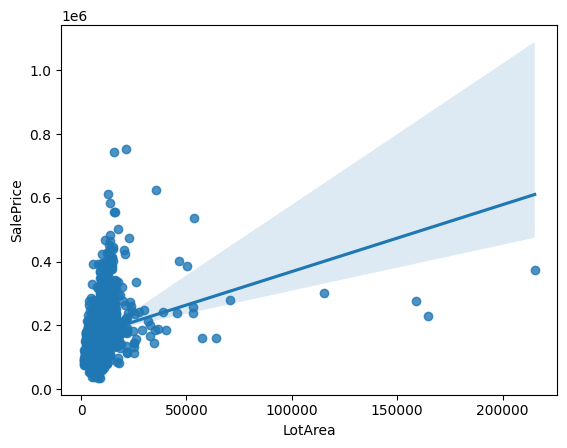

In [33]:
import seaborn as sns #seaborn is the library that will be used for graphs
sns.regplot(x = training_set_data["LotArea"], y = training_set_data["SalePrice"]) #regplot is for a regression graph

This graph is badly scaled since SalePrice values are much larger than LotArea values. But as a general comment one can say that it seems like as the LotArea increases SalePrice tend to increase.
The graph also shows possible outliers in the data that should be dealt with such as the 200000 LotArea value that makes the best fit line go less steep.

Identifying the distribution type of some columns first will be helpful to decide what to do with the outliers. Drawing a histogram of data columns will be helpful to visualize distributions.

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

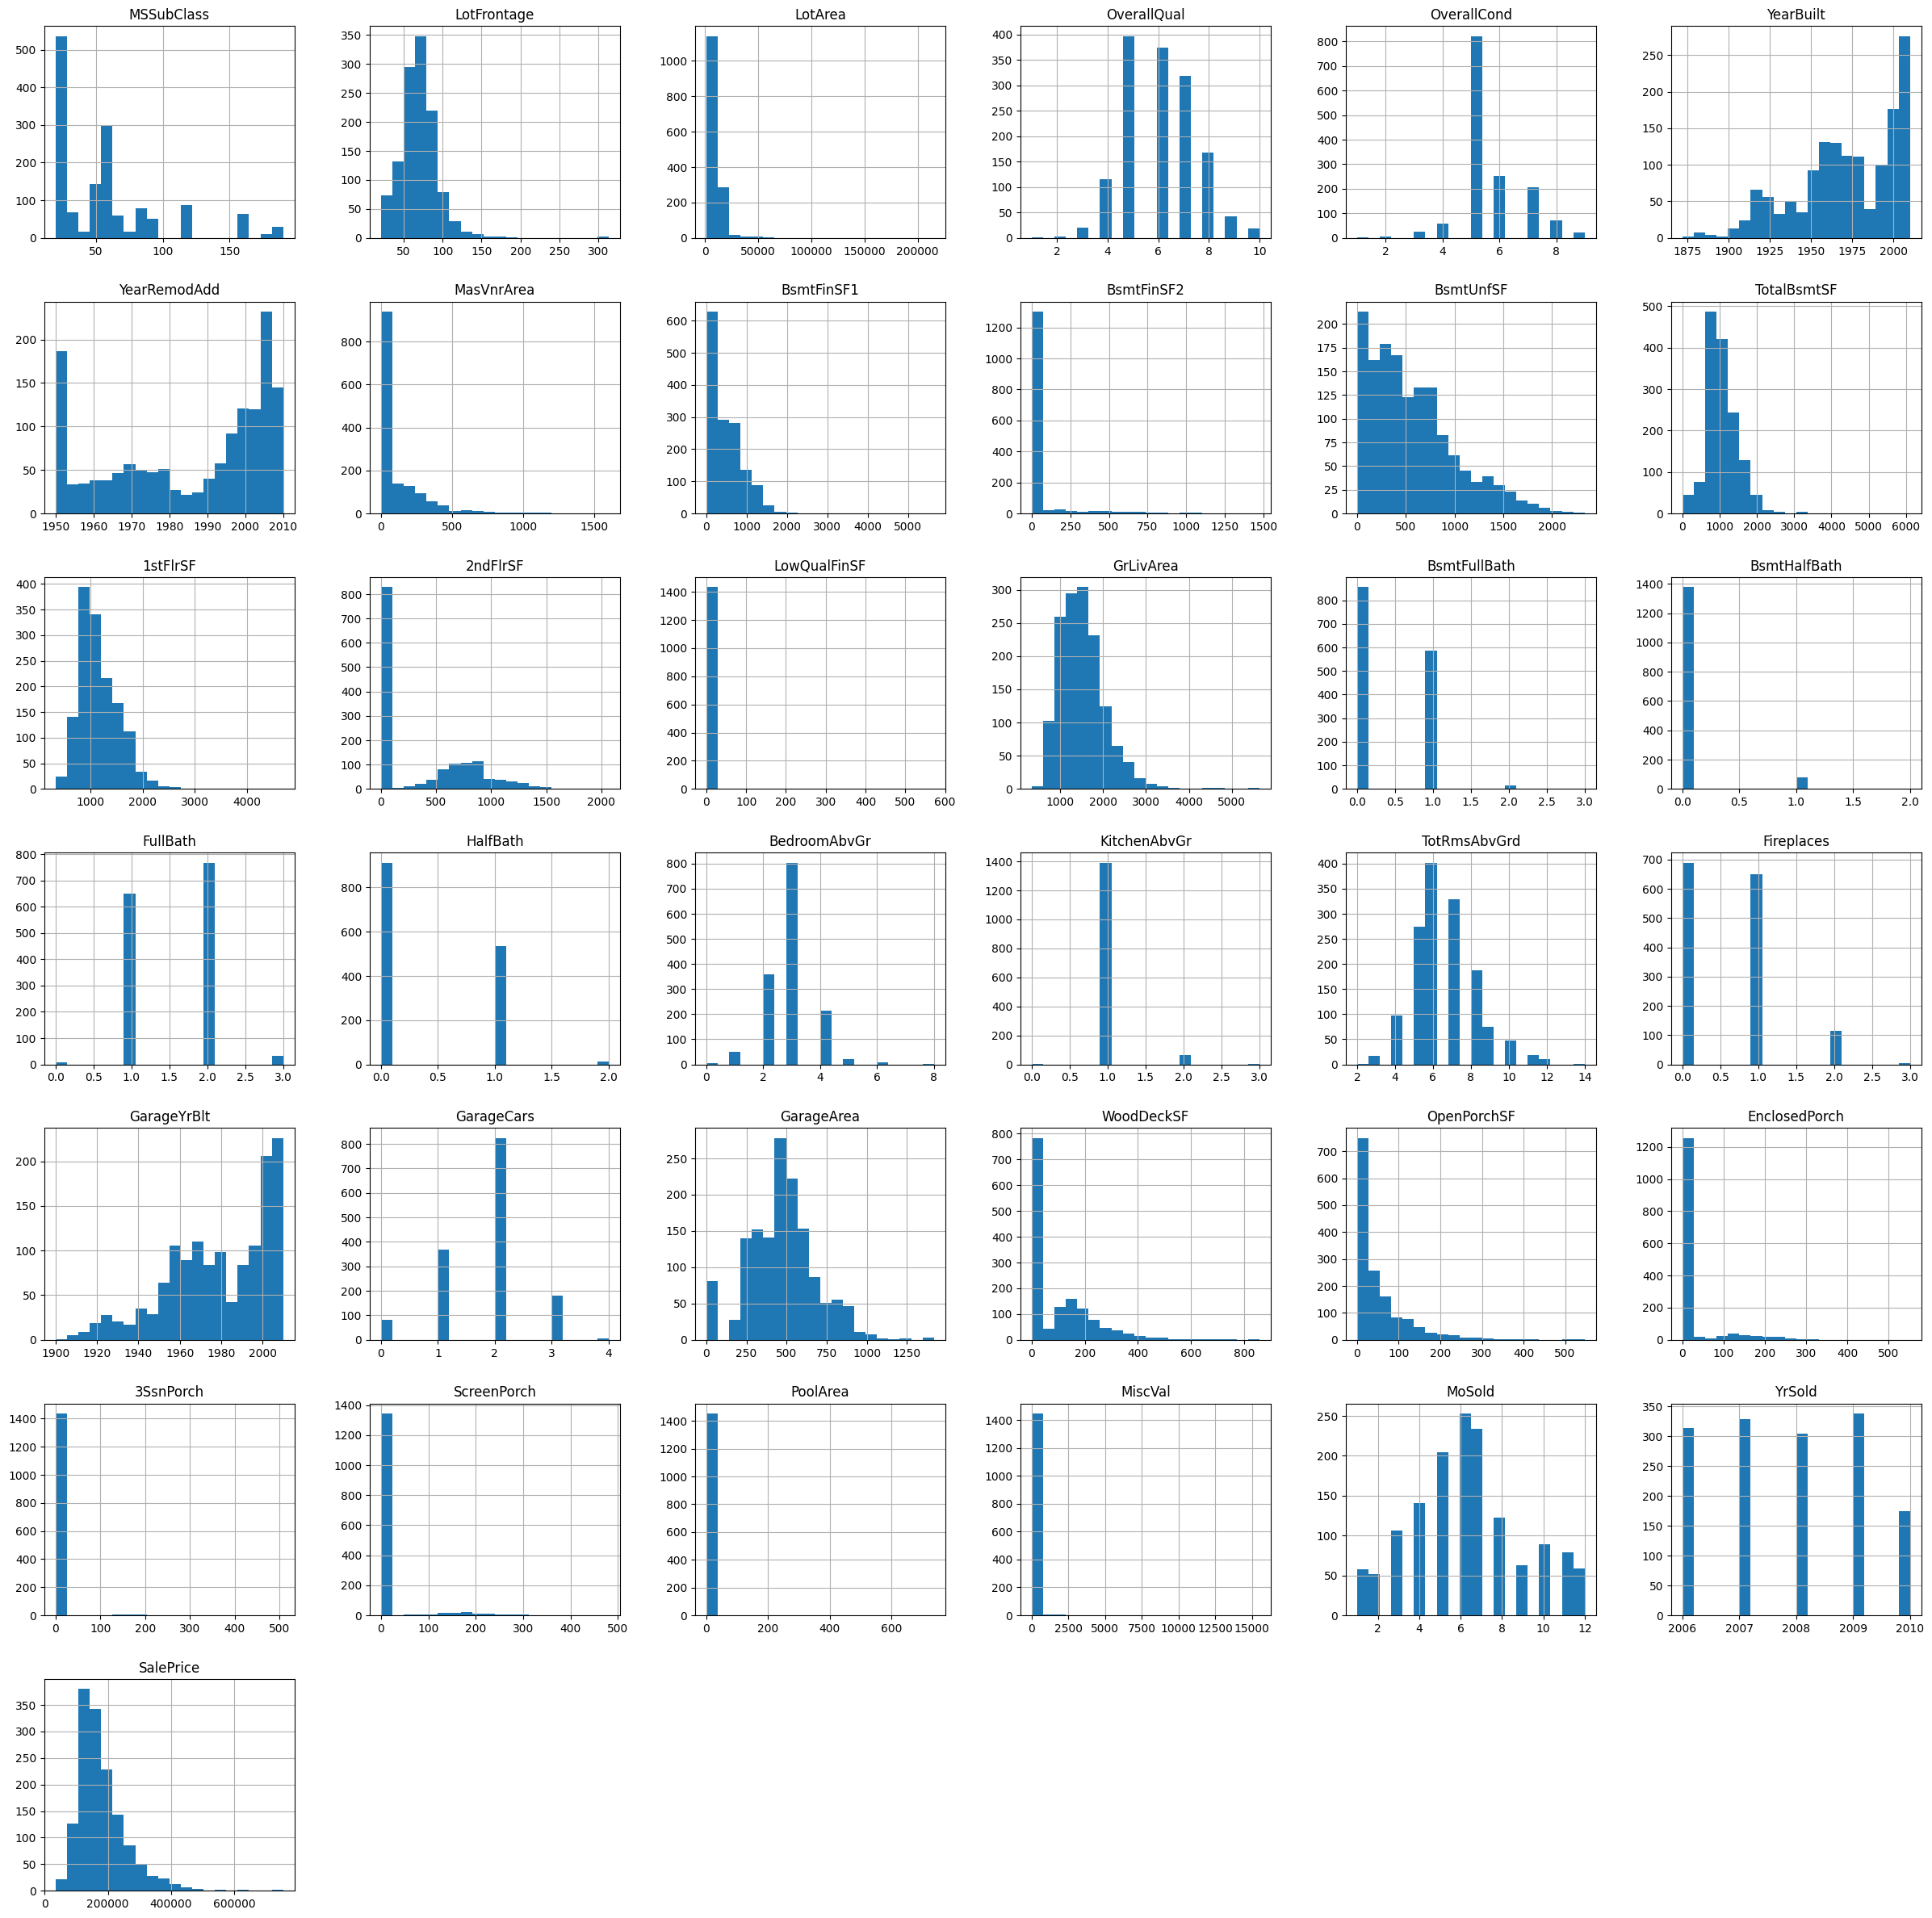

In [36]:
training_set_data.hist(bins = 20, figsize = (30,30))

These are histograms for only numerical data.

<Axes: xlabel='LotArea', ylabel='Count'>

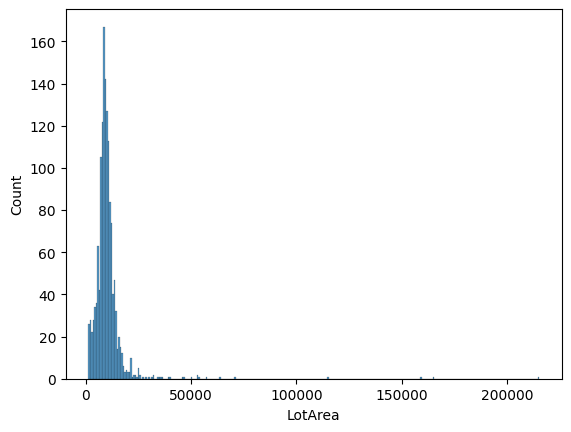

In [37]:
sns.histplot(training_set_data["LotArea"])

Outliers are also visible in the histogram plot. This column and many others do not seem to be normally distributed therefore when one uses ceratain ML algorithms this will cerate a problem since many of them assume normal distribution. 

After looking at the data in detail, one needs to first clean it so that the machine learning models can perform better and faster.

One can perform data cleaning in many different ways:
1. Deleting rows that have missing values (This method is hardly ever accepted as this possibly deletes every row in our data set)  
2. Deleting columns that have missing values (This method works much better than number 1 but still causes possible losses in data that might be important)
3. Imputation (This method is where missing values are replaced with a number, this method sometimes helps and is much better than 1 and 2) 
*To apply imputation one should only have numeric values

In [ ]:
training_set_data.dropna() #method 1

As expected this resulted in all rows deleted since there is at least one NaN value in each row. This will not be used.

In [ ]:
deleted_columns_data = training_set_data.dropna(axis = 1, inplace = False)
print(deleted_columns_data)

In [41]:
original = training_set_data.columns
new = deleted_columns_data.dropna(axis= 1).columns
removed_columns = list(set(original) - set(new))
print("Number of columns removed: ", len(removed_columns))

Number of columns removed:  19


Some of these values could be crucially important to define the SalePrice of a house. This method will also not be preferred.

Before applying method 3 one needs to decide what to do with categorical data. There are 3 ways one can deal with categorical data:
1. Delete columns with categorical data (Like before causes loss of data)
2. Apply ordinal encoding (This is where each word in the column gets assigned a number) 
3. Apply one-hot encoding (This is where each word in the column gets its own new column and value of 1 or 0 is used for each row - 1 indicating it's present 0 it's not present -)

NOTE: Method 3 will not be tried since there are 24 columns with categorical data each having different categroies. This would result in so many new columns of data which in turn actually results in less optimal results. 

In [ ]:
training_set_data.select_dtypes(exclude = "object") #method 1 
#this method also deletes columns with NaN values

In [ ]:
from function_sheet import ordinal_encoder
encoded_training_set_data = ordinal_encoder(training_set_data)
print(encoded_training_set_data)

After applying ordinal encoding, only numerical data is present in the dataset which in turn allows imputing to be applied. 

In [ ]:
from function_sheet import imputer
imputed_training_set_data = imputer(encoded_training_set_data)
print(imputed_training_set_data)

Next step is to apply logarithmic transformation to the dataset since as mentioned before many columns in the data are not normally distributed. 

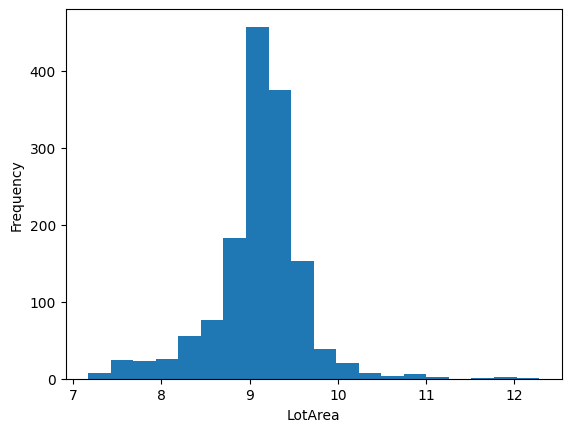

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

log_transformation = np.log(imputed_training_set_data + 1)  # Adding 1 to handle zero values

log_transformed_training_set_data = pd.DataFrame(log_transformation, columns=imputed_training_set_data.columns)

plt.figure()
plt.hist(log_transformed_training_set_data["LotArea"], bins=20)
plt.xlabel("LotArea")
plt.ylabel("Frequency")
plt.show()

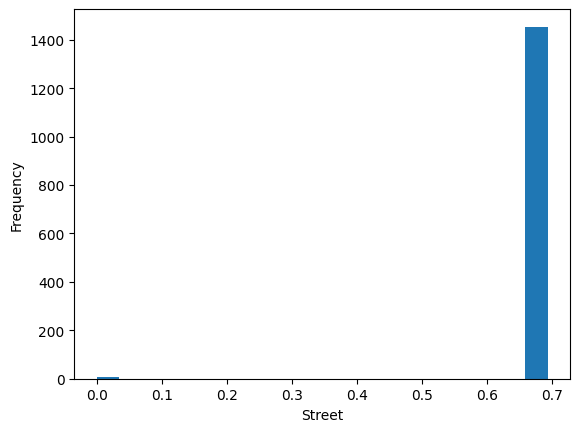

In [69]:
plt.figure()
plt.hist(log_transformed_training_set_data["Street"], bins=20)
plt.xlabel("Street")
plt.ylabel("Frequency")
plt.show()

In [ ]:
print(log_transformed_training_set_data)

Applying logarithmic transformation did help to turn some columns to normal distribution. However there are still columsn like the "Street" column where it's not possible to make data closer to normal distribution due to the column values being centered in one value the reason being transforming the categorical street values into numerical ones. 

----------------------------------------

Data preprocessing/cleaning helps machine learning models to become more accurate. Next step is feature engineering where valuable features are selected from the data set and unwanted ones are excluded. In addition new features could also be created by combining existing ones which also helps the machine learning model to work faster since the dataset will be less complex and also become more accurate. 

There are different methods that can be applied: 
1. Calculating Mutual Information Scores (This is a function that measures the relationship with a feature and the target in terms of uncertainty)
2. Creating Features (Combining existing fetaures with a certain aggregation function)


NOTE: There are more feature engineering techniques which can be applied to categorical data. However in this project it is decided that only numerical values will be used. Because the algorithms that will be used generally work well with numerical data.

In [71]:
from function_sheet import mi_scores
x = log_transformed_training_set_data
y = log_transformed_training_set_data["SalePrice"]
mi = mi_scores(x, y)
mi.head(10)

SalePrice       5.617438
Alley           1.142479
Fence           0.871687
MiscFeature     0.763617
FireplaceQu     0.575680
OverallQual     0.572501
Neighborhood    0.511945
GrLivArea       0.476846
MasVnrType      0.467863
GarageCars      0.362086
dtype: float64

Alley of a house is the feature with the highest MI score. This means that knowing the alley data will tell the most about SalePrice. It will reduce the uncertainty in SalePrice the most. The second most valuable feature is the Fence of the house. It is important to note that although a feature has a low MI score when combined with another might indeed tell a lot about the target.

New features that will be created might have higher scores. 

New features: 
- Age of the House (AgeHouse) since age of the house can tell a lot about the sale price. 
- Total Sqaure Footage (TotalSF) since total area of the house instead of individual areas of rooms and basement might be more important and can help machine learning model to work faster. 
- Whether the hosue has a pool or not (HasPool) since pools are known to add value to a house. This will be a 1 or 0 (boolean) data. 

In [72]:
from function_sheet import new_features
new_train_data_features = new_features(log_transformed_training_set_data)
new_test_data_features = new_features(log_transformed_training_set_data)
print(new_train_data_features)

      AgeHouse    TotalSF  HasPool
0     0.002492  20.257977        0
1     0.015559  14.282490        0
2     0.003490  20.415959        0
3     0.046401  20.127741        0
4     0.003990  21.048414        0
...        ...        ...      ...
1455  0.003992  20.265239        0
1456  0.016040  14.978718        0
1457  0.034914  21.181113        0
1458  0.030290  13.967580        0
1459  0.021636  14.272966        0

[1460 rows x 3 columns]


In the next step MI scores of the new features will be calculated. The expectation is that they get a higher MI score than the individual MI scores that make up the new feature. 

In [73]:
new_mi = mi_scores(x, y)
new_mi.head(20)

SalePrice       5.612275
Alley           1.138657
Fence           0.879658
MiscFeature     0.757886
TotalSF         0.701386
FireplaceQu     0.579622
OverallQual     0.575653
Neighborhood    0.512590
GrLivArea       0.478979
MasVnrType      0.470017
GarageCars      0.356916
YearBuilt       0.356637
TotalBsmtSF     0.345460
ExterQual       0.341634
GarageArea      0.334201
KitchenQual     0.330995
AgeHouse        0.329723
BsmtQual        0.327278
1stFlrSF        0.301514
GarageYrBlt     0.300362
dtype: float64

Total Square Footage got a high MI score, higher than the features that create it. 
Age of the House scored lower than the year built, however higher than the year sold which is a feature that makes it. 
HasPool not ended up in the lists. This may be due to other factors such as many houses in the region not having a pool. 

In [74]:
print(log_transformed_training_set_data['HasPool'].sum()) #to see number of houses with a pool in data set

7


As expected the numbers are too low that it cannot contribute to the statistics. 

In [75]:
new_mi.tail(15) #to see last 10 values

KitchenAbvGr    0.008127
Functional      0.007736
LowQualFinSF    0.004675
MiscVal         0.004384
LandSlope       0.003349
Street          0.001513
PoolArea        0.001439
RoofMatl        0.001321
BsmtFinSF2      0.000997
Condition2      0.000862
Utilities       0.000660
HasPool         0.000382
YrSold          0.000000
MoSold          0.000000
3SsnPorch       0.000000
dtype: float64

Last 15 values received a really low MI score (0.00 ...) especially the last 5 which all received a score of 0. This means that knowing those features does not make one more confident about the target. Although one should not rely merely on MI scores since some of these features when combined with others may become useful, in this model the aim is also to make the model become computationally more efficient and since the scores are too low they will be discarded from the actual dataset. 


In [ ]:
columns_to_be_removed = [
    'KitchenAbvGr',
    'Street',
    'Functional',
    'RoofMatl',
    'LowQualFinSF',
    'BsmtFinSF2',
    'MiscVal',
    'PoolArea',
    '3SsnPorch',
    'HasPool',
    'YrSold',
    'LandSlope',
    'MoSold',
    'Utilities',
    'Condition2',
]
log_transformed_training_set_data.drop(columns=columns_to_be_removed, inplace=True) #inplace = True modifies the original DataFrame
print(log_transformed_training_set_data)

In [ ]:
log_transformed_training_set_data.drop(['YearBuilt', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'], axis = 1, inplace = True)
print(log_transformed_training_set_data)

------------------------------------------

After the data set has been prepared, it's now ready to be used in various machine learning algorithms and neural networks. One should split the data into training and validation sets first. 

In [ ]:
X_1 = log_transformed_training_set_data.drop("SalePrice", axis = 1)
y_1 = log_transformed_training_set_data.SalePrice
print(X_1, y_1)

In [97]:
#Splitting the data into train/validation sets
from sklearn.model_selection import train_test_split
x_train_1, x_valid_1, y_train_1, y_valid_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42) 
#test size means that the data will be splitted as 80% training 20% validation set
#setting random state into a fixed number ensures the same result is obtained when the code is run again

One can apply some form of scaling to features to better assist ML models. 

NOTE: Different scaling methods (RobustScaling, MinMaxScaling, MaxAbsScaler etc.) were tried with the main aim of reducing the error in XGBoost algorithm since that is the one which is thought to be the best algorithm. StandardScaler turned out to give the least mean absolute error. 
In addition since now data is assumed to be normally distributed StandardScaler can work well.


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_1 = scaler.fit_transform(x_train_1)
x_valid_1 = scaler.transform(x_valid_1)


3 Machine Learning Algorithms to be tested are: 
1. Linear Regression (One of the simplest algorithms that could be used, where the relationship between the features and the target is linearly modelled.)
2. XGBoost Regressor (An algorithm that both chooses the "optimal gradient" as well as being efficient. This algorithm is very famous with it's accurate results therefore it has been chosen.)
3. ElasticNet Regression (An algorithm that combines L1 and L2 regularization. It's a balance between the both. L1 regularization helps with feature selection whereas L2 regularization prevents overfitting. They are also both good at handling multicolinearity. Therefore it's expected to fit the dataset.) 

In [99]:
#linear regression - method 1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train_1, y_train_1)
y_pred_1 = model.predict(x_valid_1)
score = mean_absolute_error(y_valid_1, y_pred_1)
score2 = r2_score(y_valid_1, y_pred_1)
print("Mean Absolute Error:", score)
print("R^2 score:", score2)

Mean Absolute Error: 0.09337694656887914
R^2 score: 0.8969837588981612


Closer the R^2 value to 1, better fit the model is. This number is not the optimal.

In [100]:
#XGBoost - method 2
from xgboost import XGBRegressor

XGBRegressor().fit(x_train_1, y_train_1)
model = XGBRegressor(
    n_estimators=430, #number of trees that the model builds, it should be not too high not too low
    learning_rate=0.1, #step-size, used to prevent overfitting, it should be not too lare not too low
    max_depth=4, #maximum depth of a tree
    subsample=0.8, #fraction of samples used for training each tree
    )
model.fit(x_train_1, y_train_1)
y_pred_xgb = model.predict(x_valid_1)
score = mean_absolute_error(y_valid_1, y_pred_xgb)
score2 = r2_score(y_valid_1, y_pred_xgb)
print("Mean Absolute Error:", score)
print("R^2 score:", score2)

Mean Absolute Error: 0.0717500652749826
R^2 score: 0.9285802494041857


This model received a high R^2 score. This could be improved with GridSearch an algorithm used to estimate the hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparameter_grid = {
    'n_estimators' : [50, 100, 200, 300, 430],
    'learning_rate' : [0.01, 0.1, 0.2, 0.3],
    'max_depth' : [4,5,7,9],
    'subsample' : [0.4,0.6,0.8,1.0]
}
model = XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=hyperparameter_grid, cv=5, scoring='neg_mean_absolute_error')
#negative MAE is used because the algorithm is trying to minimize the error
#cv stands for cross validation - which is a technique were data is split into smaller subsets and each of them is tried along the training. 

grid_search.fit(x_train_1, y_train_1)
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

In [ ]:
print(best_params)
print(best_xgb_model)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [90]:
#XGBoost - new values
from xgboost import XGBRegressor
XGBRegressor().fit(x_train_1, y_train_1)
model = XGBRegressor(
    n_estimators=300, #number of trees that the model builds, it should be not too high not too low
    learning_rate=0.1, #step-size, used to prevent overfitting, it should be not too lare not too low
    max_depth=4, #maximum depth of a tree
    subsample=0.8, #fraction of samples used for training each tree
    random_state = 1)
model.fit(x_train_1, y_train_1)
y_pred_1 = model.predict(x_valid_1)
score = mean_absolute_error(y_valid_1, y_pred_1)
score2 = r2_score(y_valid_1, y_pred_1)
print("Mean Absolute Error:", score)
print("R^2 score:", score2)

Mean Absolute Error: 0.07266562111957492
R^2 score: 0.9232080653014252


GridSearch resulted in a close score to the score genearted by hand.

In [91]:
#ElasticNet regression - method 3
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 1.0, #controls regularization strength
l1_ratio = 0.7, #makes a mix of l1 and l2 regularization
random_state = 10) 
model.fit(x_train_1, y_train_1)
y_pred = model.predict(x_valid_1)
score = mean_absolute_error(y_valid_1, y_pred)
score2 = r2_score(y_valid_1, y_pred)
print("Mean Absolute Error:", score)
print("R^2 score:", score2)

Mean Absolute Error: 0.33713389241665187
R^2 score: -0.005837289254832179


R^2 score needs to be between 0 and 1. A negative R^2 score is not so common however if encountered, means that the model is performing worse than a straight line. Could possibly mean overfitting or wrong model selection.

These parameters are hypertuned by trial-error method since it's seen that using methods like grid search require high computational power. 

After trying out some machine learning algorithms one can try another machine learning concept called neural netwroks to try to predict the sale price of a house. Neural Networks are series of interconnected layers and nodes that transfer information from one another and make use of mathematical functions to generate an output. 

2023-08-01 14:33:02.449314: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
37/37 [==============================] - 2s 14ms/step - loss: 11.8394 - val_loss: 8.9781
Epoch 2/100
37/37 [==============================] - 0s 5ms/step - loss: 5.0670 - val_loss: 3.0537
Epoch 3/100
37/37 [==============================] - 0s 5ms/step - loss: 2.6889 - val_loss: 2.4757
Epoch 4/100
37/37 [==============================] - 0s 5ms/step - loss: 2.2082 - val_loss: 2.2052
Epoch 5/100
37/37 [==============================] - 0s 5ms/step - loss: 1.9629 - val_loss: 2.0496
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 1.7656 - val_loss: 1.8853
Epoch 7/100
37/37 [==============================] - 0s 5ms/step - loss: 1.6386 - val_loss: 1.8264
Epoch 8/100
37/37 [==============================] - 0s 5ms/step - loss: 1.5226 - val_loss: 1.7037
Epoch 9/100
37/37 [==============================] - 0s 5ms/step - loss: 1.4397 - val_loss: 1.6587
Epoch 10/100
37/37 [==============================] - 0s 5ms/step - loss: 1.3687 - val_loss: 1.6152
Epoch 1

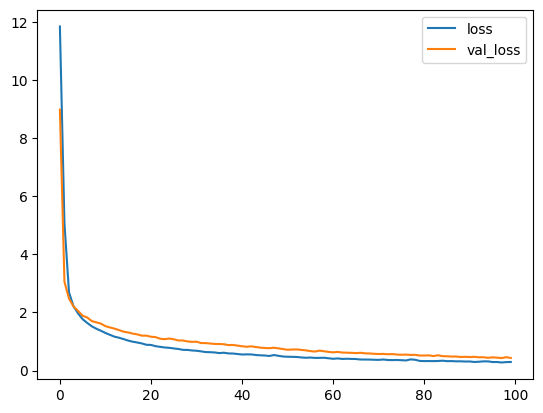

In [92]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_1.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01)), #l2 regularization is applied to further prevent overfitting
    layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),    
    layers.Dense(1),
])


optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mae')

history = model.fit(
    x_train_1, y_train_1,
    validation_data=(x_valid_1, y_valid_1),
    batch_size=32,
    epochs=100,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

This model might be too complicated for the small amount of data we have. Making the NN shallower and less complex might help to achieve better reuslts. 

Epoch 1/100
37/37 [==============================] - 2s 16ms/step - loss: 11.0990 - val_loss: 10.2045
Epoch 2/100
37/37 [==============================] - 0s 9ms/step - loss: 9.2140 - val_loss: 7.4046
Epoch 3/100
37/37 [==============================] - 0s 7ms/step - loss: 6.1238 - val_loss: 4.5574
Epoch 4/100
37/37 [==============================] - 0s 5ms/step - loss: 3.7966 - val_loss: 3.1875
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 2.6170 - val_loss: 2.2446
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 1.8712 - val_loss: 1.7583
Epoch 7/100
37/37 [==============================] - 0s 5ms/step - loss: 1.5273 - val_loss: 1.5192
Epoch 8/100
37/37 [==============================] - 0s 5ms/step - loss: 1.3479 - val_loss: 1.4087
Epoch 9/100
37/37 [==============================] - 0s 5ms/step - loss: 1.2141 - val_loss: 1.3354
Epoch 10/100
37/37 [==============================] - 0s 5ms/step - loss: 1.1214 - val_loss: 1.2780
Epoch 

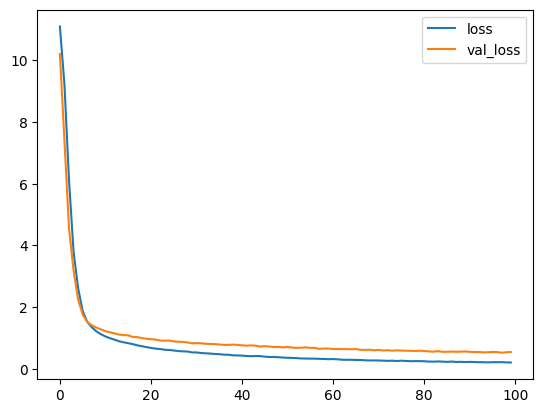

In [93]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_1.shape[1],)), #regularization is applied to further prevent overfitting   
    layers.Dense(12, activation = 'relu'),
    layers.Dense(1),
])


optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mae')

history = model.fit(
    x_train_1, y_train_1,
    validation_data=(x_valid_1, y_valid_1),
    batch_size=32,
    epochs=100,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

The model with the most accurate results was XGBRegressor. It is decided to test other data cleaning methods mentioned in this notebook to see whether they will lead to more successful model predictions with using XGBoost. 